###**Author: Mohsen Ghazel (mghazel)**
* Date: April 6th, 2021

# **Project: FASHION-MNIST Classification using Convolutional Neural Networks (CNN):**

The objective of this project is to demonstrate how to develop a Convolutional Neural Network (CNN) to classify images of clothing articles from the Fashion-MNIST dataset:

  * Fashion-MNIST is a dataset of Zalando's article images
  * It contains training set of 60,000 examples
  * It contains a test set of 10,000 examples. 
    * Each example is a 28x28 grayscale image
    * Each example is associated with a label from 10 classes. 
  * Recently, the Fashion-MNIST is starting to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine and deep learning algorithms. 
     * It shares the same image size and structure of training and testing splits.
     * Additional detailed about the Fashion can be found here:
       * https://github.com/zalandoresearch/fashion-mnist

* We shall apply the standard Machine and Deep Learning model development and evaluation process, with the following steps:

  1. Load the MNIST dataset of clothing-articles digits:
      *       60,000 labelled training examples
      *       10,000 labelled test examples
      *   Each closing article example is 28x28  pixels grayscale image.

  2. Build a simple CNN model
  3. Train the selected ML model
  4. Deploy the trained on the test data 
  5. Evaluate the performance of the trained model using evaluation metrics:
    *    Accuracy
    *    Confusion Matrix
    *    Other metrics derived form the confusion matrix.


##**Part 1: Imports and Global Variables :**

###**1.1) Standard scientific Python imports:**

In [30]:
# Numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
# - import sklearn to use the confusion matrix function
from sklearn.metrics import confusion_matrix
# import itertools
import itertools
# opencv
import cv2
# tensorflow
import tensorflow as tf

# keras input layer
from tensorflow.keras.layers import Input
# keras conv2D layer
from tensorflow.keras.layers import Conv2D
# keras MaxPooling2D layer
from tensorflow.keras.layers import MaxPooling2D
# keras Dense layer
from tensorflow.keras.layers import Dense
# keras Flatten layer
from tensorflow.keras.layers import Flatten
# keras Dropout layer
from tensorflow.keras.layers import Dropout
# keras model
from tensorflow.keras.models import Model
# keras sequential model
from tensorflow.keras.models import Sequential
# optimizers
from tensorflow.keras.optimizers import SGD

# random number generators values
# seed for reproducing the random number generation
from random import seed
# random integers: I(0,M)
from random import randint
# random standard unform: U(0,1)
from random import random
# time
import datetime
# I/O
import os
# sys
import sys

# check for successful package imports and versions
# python
print("Python version : {0} ".format(sys.version))
# OpenCV
print("OpenCV version : {0} ".format(cv2.__version__))
# numpy
print("Numpy version  : {0}".format(np.__version__))
# tensorflow
print("Tensorflow version  : {0}".format(tf.__version__))


Python version : 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0] 
OpenCV version : 4.1.2 
Numpy version  : 1.19.5
Tensorflow version  : 2.4.1


###**1.2) Global variables:**

In [31]:
# -set the random_state seed = 100 for reproducibilty
random_state_seed = 100

# the number of visualized images
num_visualized_images = 25

##**Part 2: Load FASHION-MNIST Dataset**
###**2.1) Load the FASHION-MNIST dataset :**
* Load the Fashion-MNIST dataset of clothing-articles:
  * Fashion-MNIST is a dataset of Zalando's article images
  * It contains training set of 60,000 examples
  * It contains a test set of 10,000 examples. 
    * Each example is a 28x28 grayscale image
    * Each example is associated with a label from 10 classes. 
  * TRecently, the Fashion-MNIST is starting to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine and deep learning algorithms. 
  * It shares the same image size and structure of training and testing splits.
  * Additional detailed about the Fashion can be found here:
    * https://github.com/zalandoresearch/fashion-mnist


In [32]:
# Load in the FASHION-MNIST data set
# - It has 10 classes
fashion_mnist = tf.keras.datasets.fashion_mnist
# split the data into teaining and test subsets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

###**2.2) Explore training and test images:**

####**2.2.1) Display the number and shape of the training and test subsets:**

In [33]:
#------------------------------------------------------
# Training data:
#------------------------------------------------------
# the number of training images
num_train_images = x_train.shape[0]
print("----------------------------------------------")
print("Training data:")
print("----------------------------------------------")
print("x_train.shape: ", x_train.shape)
print("Number of training images: ", num_train_images)
print("Image size: ", x_train.shape[1:])

#------------------------------------------------------
# Test data:
#------------------------------------------------------
# the number of test images
num_test_images = x_test.shape[0]
print("----------------------------------------------")
print("Test data:")
print("----------------------------------------------")
print("x_test.shape: ", x_test.shape)
print("Number of test images: ", num_test_images)
print("Image size: ", x_test.shape[1:])
print("----------------------------------------------")

----------------------------------------------
Training data:
----------------------------------------------
x_train.shape:  (60000, 28, 28)
Number of training images:  60000
Image size:  (28, 28)
----------------------------------------------
Test data:
----------------------------------------------
x_test.shape:  (10000, 28, 28)
Number of test images:  10000
Image size:  (28, 28)
----------------------------------------------


####**2.2.2) Reshape the training and test images to 3D:**
* The training and test images are 2D grayscale/binary:
* CNN expect the images to be of shape: 
  * height x width x color
* We need to add a fourth color dimension to:
  * the training images: x_train
  * the test images: x_test

In [34]:
#------------------------------------------------------
# reshape the x_train and x_test images 4D:
#------------------------------------------------------
# Add a fourth color dimension to x_train
x_train = np.expand_dims(x_train, -1) 
# add a fourth color dimension to x_test
x_test = np.expand_dims(x_test, -1)
#------------------------------------------------------
# display the new shapes of x_train and x_test
#------------------------------------------------------
print("----------------------------------------------")
print("Re-shaped x_train:")
print("----------------------------------------------")
print("x_train.shape: ", x_train.shape)
print("----------------------------------------------")
print("Re-shaped x_test:")
print("----------------------------------------------")
print("x_test.shape: ", x_test.shape)
print("----------------------------------------------")

----------------------------------------------
Re-shaped x_train:
----------------------------------------------
x_train.shape:  (60000, 28, 28, 1)
----------------------------------------------
Re-shaped x_test:
----------------------------------------------
x_test.shape:  (10000, 28, 28, 1)
----------------------------------------------


####**2.2.3) Display the targets/classes:**

*   There 10 classes
*   Each training and test example is assigned to one of the following labels
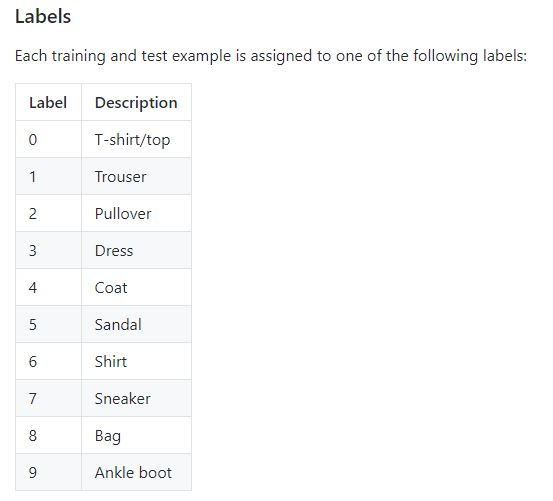



####**2.2.3.1) Display the number of classes**

In [35]:
# The number of classes
num_classes = len(set(y_train))
print("The number of classes:", num_classes)

The number of classes: 10


####**2.2.3.2) Create meaningful labels for the different classes:**

In [36]:
#-------------------------------------------------------------------------------
# Create a class-label mapping:
#-------------------------------------------------------------------------------
#  - Create a string containg all the classification labels 
#  - Seperated by new line character
#-------------------------------------------------------------------------------
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

####**2.2.3.3) Display the created class-label mapping:**

In [37]:
# display the classes
for counter in range(num_classes):
  print('Class ID = {}, Class name = {}'.format(counter, labels[counter]))

Class ID = 0, Class name = T-shirt/top
Class ID = 1, Class name = Trouser
Class ID = 2, Class name = Pullover
Class ID = 3, Class name = Dress
Class ID = 4, Class name = Coat
Class ID = 5, Class name = Sandal
Class ID = 6, Class name = Shirt
Class ID = 7, Class name = Sneaker
Class ID = 8, Class name = Bag
Class ID = 9, Class name = Ankle boot


####**2.2.4) Examine the number of images for each class of the training and testing subsets:**

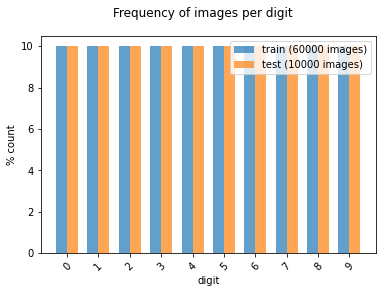

In [38]:
# create a histogram of the number of images in each class/digit:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('digit')
    plt.ylabel(ylabel_text)
 
plt.suptitle('Frequency of images per digit')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} images)'.format(len(y_train)), 
    'test ({0} images)'.format(len(y_test)), 
]);

####**2.2.5) Visualize some of the training and test  images and their associated targets:**

* First implement a visualization functionality to visualize the number of randomly selected images:

In [39]:
"""
# A utility function to visualize multiple images:
"""
def visualize_images_and_labels(num_visualized_images = 25, dataset_flag = 1):
  """To visualize images.

      Keyword arguments:
         - num_visualized_images -- the number of visualized images (deafult 25)
         - dataset_flag -- 1: training dataset, 2: test dataset
      Return:
         - None
  """
  #--------------------------------------------
  # the suplot grid shape:
  #--------------------------------------------
  num_rows = 5
  # the number of columns
  num_cols = num_visualized_images // num_rows
  # setup the subplots axes
  fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 10))
  # set a seed random number generator for reproducible results
  seed(random_state_seed)
  # iterate over the sub-plots
  for row in range(num_rows):
      for col in range(num_cols):
        # get the next figure axis
        ax = axes[row, col];
        # turn-off subplot axis
        ax.set_axis_off()
        #--------------------------------------------
        # if the dataset_flag = 1: Training data set
        #--------------------------------------------
        if ( dataset_flag == 1 ): 
          # generate a random image counter
          counter = randint(0,num_train_images)
          # get the training image
          image = np.squeeze(x_train[counter,:])
          # get the target associated with the image
          label = labels[y_train[counter]]
        #--------------------------------------------
        # dataset_flag = 2: Test data set
        #--------------------------------------------
        else: 
          # generate a random image counter
          counter = randint(0,num_test_images)
          # get the test image
          image = np.squeeze(x_test[counter,:])
          # get the target associated with the image
          label = labels[y_test[counter]]
        #--------------------------------------------
        # display the image
        #--------------------------------------------
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        # set the title showing the image label
        ax.set_title(str(label), size = 8)

#####**2.2.5.1) Visualize some of the training images and their associated targets:**

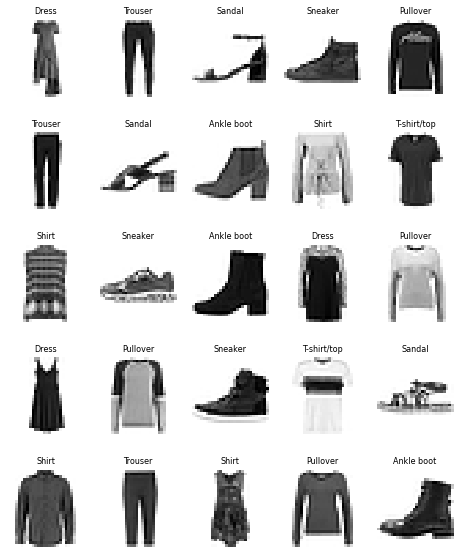

In [40]:
# call the function to visualize the training images
visualize_images_and_labels(num_visualized_images, 1)

#####**2.2.5.2) Visualize some of the test images and their associated targets:**

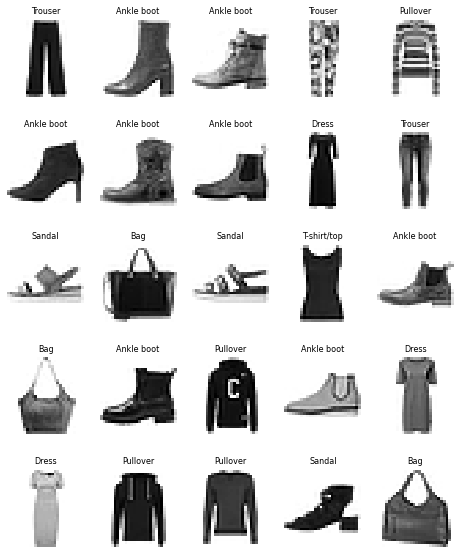

In [41]:
# call the function to visualize the test images
visualize_images_and_labels(num_visualized_images, 2)

###**2.3) Normalize the training and test images to the interval: [0, 1]:**

In [42]:
# Normalize the training images
x_train = x_train / 255.0
# Normalize the test images
x_test = x_test / 255.0

##**Part 3: Build the CNN model architecture:**

###**3.1: Develop the structure of the CNN model to classify the FASHION-MINIST images.**

In [44]:
#-------------------------------------------------------------------------------
# Build the sequential CNN model
#-------------------------------------------------------------------------------
# Build the model using the functional API
#-------------------------------------------------------------------------------
# Layer # 1: Input layer
#-------------------------------------------------------------------------------
# - input images size: (28, 28, 1)
#-------------------------------------------------------------------------------
i = Input(shape=x_train[0].shape)            
#-------------------------------------------------------------------------------
# Layer # 2: Convolutional layer
#-------------------------------------------------------------------------------
# - 32 filters:  
#   - size: 3x3
#   - same
#   - stride = 2 (non-overlapping)
# - Activation function: relu
#-------------------------------------------------------------------------------               
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)     
#-------------------------------------------------------------------------------
# Layer # 3: Convolutional layer
#-------------------------------------------------------------------------------
# - 64 filters:  
#   - size: 3x3
#   - same
#   - stride = 2 (non-overlapping)
# - Activation function: relu
#------------------------------------------------------------------------------- 
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)     
#-------------------------------------------------------------------------------
# Layer # 4: Convolutional layer
#-------------------------------------------------------------------------------
# - 128 filters:  
#   - size: 3x3
#   - same
#   - stride = 2 (non-overlapping)
# - Activation function: relu
#------------------------------------------------------------------------------- 
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)    
#-------------------------------------------------------------------------------
# Layer # 5: Flatten
#-------------------------------------------------------------------------------
# - Flatten to connect to the next Fully-Connected Dense layer
#------------------------------------------------------------------------------- 
x = Flatten()(x)                                           
#-------------------------------------------------------------------------------
# Layer # 6: Dropout layer
#-------------------------------------------------------------------------------
# - p = 0.20  
#------------------------------------------------------------------------------- 
x = Dropout(0.2)(x)                                        
#-------------------------------------------------------------------------------
# Layer # 7: Dense layer
#-------------------------------------------------------------------------------
# - 512 neurons
# - Activation function: relu
#------------------------------------------------------------------------------- 
x = Dense(512, activation='relu')(x)                        
#-------------------------------------------------------------------------------
# Layer # 8: Dropout layer
#-------------------------------------------------------------------------------
# - p = 0.20  
#------------------------------------------------------------------------------- 
x = Dropout(0.2)(x)                                        
#-------------------------------------------------------------------------------
# Layer # 9: Output layer
#-------------------------------------------------------------------------------
# - Number of neurons: num_classes 
# - Activation function: softmax:
#  - Suitable for multi-class classification.
#------------------------------------------------------------------------------- 
x = Dense(num_classes, activation='softmax')(x)           
#-------------------------------------------------------------------------------          
# Create the model with above structure:
#-------------------------------------------------------------------------------
model = Model(i, x)

###**3.2: Printout the model summary:**

In [45]:
# display a model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656

##**Part 4: Compile the CNN model**
* Compile the CNN model, developed above

In [46]:
#-------------------------------------------------------------------------------
# Compile the model
#-------------------------------------------------------------------------------
# experiment with the optimizer
# opt = SGD(lr=0.01, momentum=0.9)
# compile the model
model.compile(optimizer='adam',                       # optimzer: adam
              loss='sparse_categorical_crossentropy', # used for multi-class models
              metrics=['accuracy'])                   # performance evaluation metric

##**Part 5: Train/Fit the model**
* Start training the compiled CNN model.

In [59]:
#-------------------------------------------------------------------------------
# Train/fit the model:
#-------------------------------------------------------------------------------
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1246 - accuracy: 0.9526 - val_loss: 0.3747 - val_accuracy: 0.8960
Epoch 2/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1190 - accuracy: 0.9555 - val_loss: 0.3917 - val_accuracy: 0.9009
Epoch 3/100
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1147 - accuracy: 0.9563 - val_loss: 0.3773 - val_accuracy: 0.8982
Epoch 4/100
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1069 - accuracy: 0.9591 - val_loss: 0.4193 - val_accuracy: 0.8992
Epoch 5/100
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1042 - accuracy: 0.9596 - val_loss: 0.4038 - val_accuracy: 0.8966
Epoch 6/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1022 - accuracy: 0.9611 - val_loss: 0.4203 - val_accuracy: 0.8977
Epoch 7/100
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0943 - accuracy: 0.9646 - val_loss: 0

##**Part 6: Evaluate the trained CNN model**
* Evaluate the trained CNN model on the test data using different evaluation metrics:
   * Loss function
   * Accuracy
   * Confusion matrix.

###**6.1) Loss function:**
* Display the variations of the training and validation loss function with the number of epochs:

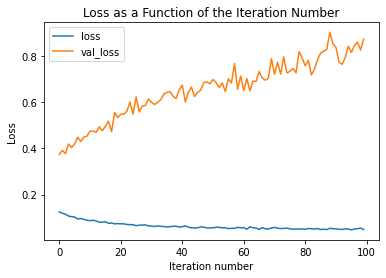

In [60]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss');
plt.plot(r.history['val_loss'], label='val_loss');
plt.legend();
plt.xlabel('Iteration number');
plt.ylabel('Loss');
plt.title('Loss as a Function of the Iteration Number');

###**6.2) Accuracy:**
* Display the variations of the training and validation accuracy with the number of epochs:

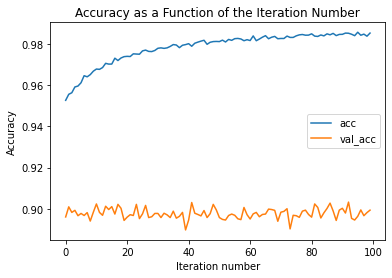

In [61]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc');
plt.plot(r.history['val_accuracy'], label='val_acc');
plt.legend();
plt.xlabel('Iteration number');
plt.ylabel('Accuracy');
plt.title('Accuracy as a Function of the Iteration Number');

###**6.3) Compute the test-data Accuracy:**
* Compute and display the accuracy on the test-data:

In [62]:
# Compute the model accuracy on the test data
accuracy_test_data = model.evaluate(x_test, y_test)
# display the atest-data accuracy
print('-------------------------------------------------------')
print('The test-data accuracy = ' + str(accuracy_test_data[1]))
print('-------------------------------------------------------')

313/313 [==============================] - 1s 5ms/step - loss: 0.8747 - accuracy: 0.8993
-------------------------------------------------------
The test-data accuracy = 0.8992999792098999
-------------------------------------------------------


###**6.4) Confusion Matrix Visualizations:**
* Compute the confusion matrix

Confusion matrix, without normalization
[[844   1  26  11   2   1 106   0   9   0]
 [  1 968   1  16   3   0   9   0   2   0]
 [ 12   1 854  10  55   0  68   0   0   0]
 [ 18   3  16 908  27   1  26   0   1   0]
 [  3   1  69  24 832   0  67   0   4   0]
 [  0   0   0   0   0 968   0  23   0   9]
 [ 91   0  65  27  81   0 721   0  15   0]
 [  0   0   0   0   0   6   0 976   0  18]
 [  2   1   3   5   1   1   9   2 975   1]
 [  0   0   0   0   0   6   1  46   0 947]]


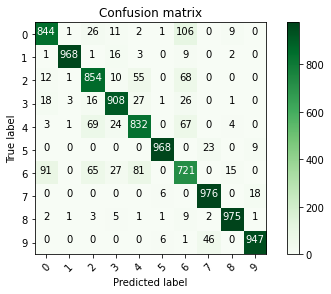

In [66]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  # Display the confusion matrix
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


#--------------------------------------------------------
# Performance visualization:
#--------------------------------------------------------
# prediction 
p_test = model.predict(x_test).argmax(axis=1)
# compute confusuon matrix
cm = confusion_matrix(y_test, p_test)
# visualize the confusion matrix
plot_confusion_matrix(cm, list(range(10)))



###**6.5) Examine some of the misclassified test-data clothing-items:**
*   Display some of the misclassified items from the test data:

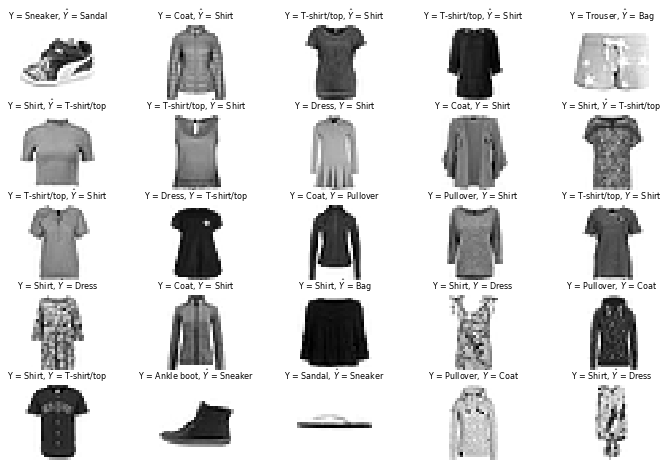

In [64]:
# - Find the indices of all the mis-classified examples
misclassified_idx = np.where(p_test != y_test)[0] # select the index
# setup the subplot grid for the visualized images
 # the suplot grid shape
num_rows = 5
# the number of columns
num_cols = num_visualized_images // num_rows
# setup the subplots axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))
# set a seed random number generator for reproducible results
seed(random_state_seed)
# iterate over the sub-plots
for row in range(num_rows):
  for col in range(num_cols):
    # get the next figure axis
    ax = axes[row, col];
    # turn-off subplot axis
    ax.set_axis_off()
    # select a random mis-classified example
    counter = np.random.choice(misclassified_idx)
    # get test image 
    image = np.squeeze(x_test[counter,:])
    # get the true labels of the selected image
    label = labels[y_test[counter]]
    # get the predicted label of the test image
    yhat = labels[p_test[counter]]
    # display the image 
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # display the true and predicted labels on the title of tehe image
    ax.set_title('Y = %s, $\hat{Y}$ = %s' % ((label), (yhat)), size = 8)

##**Part 7: Display a final message after successful execution completion:**

In [65]:
# display a final message
# current time
now = datetime.datetime.now()
# display a message
print('Program executed successfully on: '+ 
      str(now.strftime("%Y-%m-%d %H:%M:%S") + "...Goodbye!\n"))

Program executed successfully on: 2021-04-06 17:48:04...Goodbye!

